In [1]:
#from google.colab import drive
#drive.mount('/content/drive')

In [1]:
#!pip install boruta

Note: you may need to restart the kernel to use updated packages.


In [2]:
#!pip install imblearn

In [63]:
#!pip install openpyxl

In [1]:
################# SATURDAYSAI #################
### Importación de las librerías necesarias ###
###############################################
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA, SparsePCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler

# from pylab import rcParams

from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTETomek
from imblearn.ensemble import BalancedBaggingClassifier
from collections import Counter

# rcParams['figure.figsize'] = 14, 8.7 # 
LABELS = ["1","2"]

from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import SelectKBest

#### Selección de variables con Boruta ####
import boruta 
from sklearn.ensemble import RandomForestClassifier

%matplotlib inline

# Carga de datos

In [2]:
### Importación de la Base de datos ###
file = "C:/Users/user/Google Drive/Saturdays.AI/PROYECTO/Datos/EstudioPrevalencia2015.xlsx"
xl = pd.ExcelFile(file)

In [3]:
print(xl.sheet_names)

['Hoja1', 'BBDD fichero total', 'títulos y códigos']


In [3]:
df=xl.parse('BBDD fichero total')

In [4]:
# for column in df.columns:
#     print(str(column))
df.head(10)

,numero,modalidad,P0R1,P0B,POB1,P0B2,P0C,P0F1,POF2,POF3,...,DB4,DB5,DB6,DB6B,DB7,DB8,PESO,PESO1,revisadas_personales,revisadas_telefónicas
0,1006,1,9,4,4,32,1,1,1.0,2.0,...,4,2,2,NaN,1,3,1.128607,1.128607,NaN,NaN
1,1007,1,3,5,6,52,1,1,1.0,2.0,...,5,1,1,NaN,1,1,1.100234,1.100234,NaN,NaN
2,1008,1,4,5,8,67,2,1,1.0,2.0,...,100,4,5,NaN,1,4,1.196041,1.196041,NaN,NaN
3,1009,1,5,5,7,60,2,1,1.0,2.0,...,100,2,3,NaN,1,3,1.062141,1.062141,NaN,NaN
4,1010,1,5,5,6,51,2,1,1.0,2.0,...,5,2,3,NaN,1,3,1.062141,1.062141,NaN,1.0
5,1011,1,5,5,3,18,1,1,1.0,2.0,...,2,99,1,NaN,1,3,1.062141,1.062141,NaN,NaN
6,1012,1,5,5,4,27,2,1,1.0,1.0,...,4,1,1,NaN,1,3,0.720738,0.753777,NaN,NaN
7,1013,1,5,5,4,34,2,1,1.0,2.0,...,100,2,2,NaN,1,2,1.062141,1.062141,NaN,NaN
8,1014,1,5,5,7,62,1,1,2.0,NaN,...,100,2,3,NaN,1,2,1.062141,1.062141,NaN,NaN
9,1015,1,9,1,4,34,2,2,NaN,NaN,...,6,2,2,NaN,1,2,1.128607,1.128607,NaN,1.0


In [5]:
df.describe()

,numero,modalidad,P0R1,P0B,POB1,P0B2,P0C,P0F1,POF2,POF3,...,DB4,DB5,DB6,DB6B,DB7,DB8,PESO,PESO1,revisadas_personales,revisadas_telefónicas
count,6816.000000,6816.0,6816.000000,6816.000000,6816.000000,6816.000000,6816.000000,6816.000000,5202.000000,4669.000000,...,6816.000000,6816.000000,6816.000000,149.000000,6816.000000,6816.000000,6816.000000,6816.000000,660.0,1307.0
mean,4577.223738,1.0,8.456719,3.571156,5.777142,47.907864,1.516432,1.236796,1.102461,1.911544,...,39.057072,2.367811,2.843603,5.993289,1.098005,2.488116,1.050457,1.046409,1.0,1.0
std,2076.015852,0.0,4.826821,1.763138,1.626472,17.571003,0.499767,0.425147,0.303282,0.283987,...,46.042025,6.428943,6.887837,1.646030,2.087890,7.864340,0.181920,0.182712,0.0,0.0
min,1006.000000,1.0,1.000000,1.000000,3.000000,18.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,5.000000,1.000000,0.000000,0.175572,0.131613,1.0,1.0
25%,2777.750000,1.0,5.000000,2.000000,4.000000,34.000000,1.000000,1.000000,1.000000,2.000000,...,4.000000,1.000000,1.000000,5.000000,1.000000,1.000000,1.082998,1.082998,1.0,1.0
50%,4565.500000,1.0,9.000000,4.000000,6.000000,46.000000,2.000000,1.000000,1.000000,2.000000,...,5.000000,2.000000,2.000000,5.000000,1.000000,2.000000,1.107651,1.107651,1.0,1.0
75%,6359.250000,1.0,13.000000,5.000000,7.000000,62.000000,2.000000,1.000000,1.000000,2.000000,...,100.000000,2.000000,3.000000,7.000000,1.000000,3.000000,1.115778,1.115778,1.0,1.0
max,8240.000000,1.0,19.000000,6.000000,8.000000,95.000000,2.000000,2.000000,2.000000,2.000000,...,100.000000,100.000000,100.000000,16.000000,100.000000,100.000000,1.196041,1.196041,1.0,1.0


# Limpieza de los datos

In [6]:
# Declaración de funciones para limpiar el Dataframe

def change_99_100(x):
    if (type(x) == int or type(x) == float) and x >= 99.0:
      return None
    else :
      return x

def change_column_P23(x):
    if (type(x) == int or type(x) == float) and x >= 2.0:
      return 2
    else :
      return 1

def cleanDataset(df):
  print("Tamaño del dataframe antes de limpieza ", df.shape)

  new_df = df[df['P23'] <= 3]
  print("Eliminadas filas que no han contestado a la variable objetivo ", new_df.shape )

  new_df = new_df.apply(change_99_100)
  print("Eliminados los valores de 99 o 100", new_df.shape)

  new_df['P23'] = new_df['P23'].apply(change_column_P23)
  print("Unificados Valores de P23 2 y 3 en solo 2", new_df.shape)

  new_df = new_df.dropna(axis=1, how='any')
  print("Eliminadas todas las columnas con al menos un valor nulo", new_df.shape)

  new_df = new_df.drop(['numero', 'modalidad'],1)
  print("Eliminadas columnas que no aportan valor ", new_df.shape)

  new_df = new_df[['P0R1','P0B','POB1','P0C','P3','P4','P5','P6','P7','P8','P9','P11',
                   'P13','P15A','P16A','P18A','P18B','P18C','P20','P21','P22','P24','P26',
                   'P28','P29','P30','P31','P32','P33','P34','P35','P38SP1','P38SP2',
                   'P38SP3','P38SP4','P38SP5','P38SP6','P38SP7','P38SP8','P38SP9',
                   'P39','P41','P43','P46','DB0','DB1','DB3','DB4','DB5','DB6','DB7','DB8', 'P23'
                  ]]
  print("Después del análisis del investigador dejamos las columnas más interesantes ", new_df.shape)

  return new_df

In [7]:
df_cleaned = cleanDataset(df)
# new_df.describe()
print(type(df_cleaned))
# Variables del experto ya eliminadas previamente
# df[['P50', 'DB2', 'P47', 'P38SP10', 'POF3']].describe()

Tamaño del dataframe antes de limpieza  (6816, 240)
Eliminadas filas que no han contestado a la variable objetivo  (5159, 240)
Eliminados los valores de 99 o 100 (5159, 240)
Unificados Valores de P23 2 y 3 en solo 2 (5159, 240)
Eliminadas todas las columnas con al menos un valor nulo (5159, 127)
Eliminadas columnas que no aportan valor  (5159, 125)
Después del análisis del investigador dejamos las columnas más interesantes  (5159, 53)
<class 'pandas.core.frame.DataFrame'>


In [9]:
df_cleaned=df_cleaned.dropna()

In [10]:
df_cleaned.isnull().any()

P0R1      False
P0B       False
POB1      False
P0C       False
P3        False
P4        False
P5        False
P6        False
P7        False
P8        False
P9        False
P11       False
P13       False
P15A      False
P16A      False
P18A      False
P18B      False
P18C      False
P20       False
P21       False
P22       False
P24       False
P26       False
P28       False
P29       False
P30       False
P31       False
P32       False
P33       False
P34       False
P35       False
P38SP1    False
P38SP2    False
P38SP3    False
P38SP4    False
P38SP5    False
P38SP6    False
P38SP7    False
P38SP8    False
P38SP9    False
P39       False
P41       False
P43       False
P46       False
DB0       False
DB1       False
DB3       False
DB4       False
DB5       False
DB6       False
DB7       False
DB8       False
P23       False
dtype: bool

# Análisis estadístico

In [9]:
df_cleaned.columns

Index(['P0R1', 'P0B', 'POB1', 'P0C', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9',
       'P11', 'P13', 'P15A', 'P16A', 'P18A', 'P18B', 'P18C', 'P20', 'P21',
       'P22', 'P24', 'P26', 'P28', 'P29', 'P30', 'P31', 'P32', 'P33', 'P34',
       'P35', 'P38SP1', 'P38SP2', 'P38SP3', 'P38SP4', 'P38SP5', 'P38SP6',
       'P38SP7', 'P38SP8', 'P38SP9', 'P39', 'P41', 'P43', 'P46', 'DB0', 'DB1',
       'DB3', 'DB4', 'DB5', 'DB6', 'DB7', 'DB8', 'P23'],
      dtype='object')

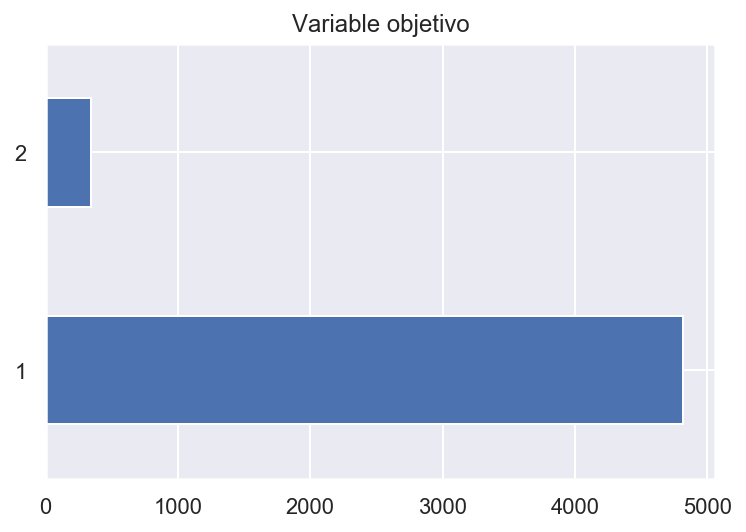

In [112]:
### Variable Objetivo ###
plot= df_cleaned['P23'].value_counts().plot(kind='barh', title="Variable objetivo") 

In [113]:
### Tabla Variable objetivo - Comunidad autónoma ###
pd.crosstab(df_cleaned['P23'], df_cleaned['P0R1'], margins=True)


P0R1,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,All
P23,,,,,,,,,,,,,,,,,,,,
1,1023,150,146,129,254,63,215,173,509,563,83,315,633,153,72,225,44,37,33,4820
2,33,7,5,3,19,1,33,14,36,31,5,20,77,6,4,24,16,1,4,339
All,1056,157,151,132,273,64,248,187,545,594,88,335,710,159,76,249,60,38,37,5159


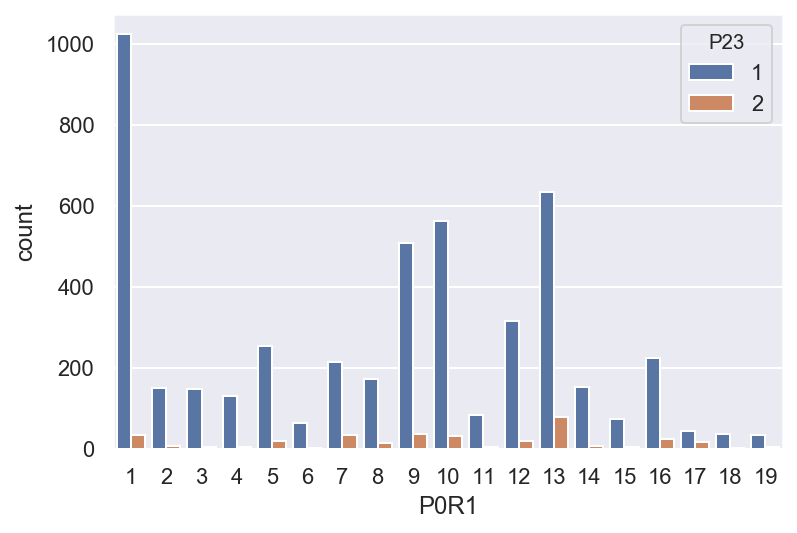

In [114]:
sns.set()
%config InlineBackend.figure_format='retina'
sns.countplot(x='P0R1', hue='P23', data=df_cleaned);

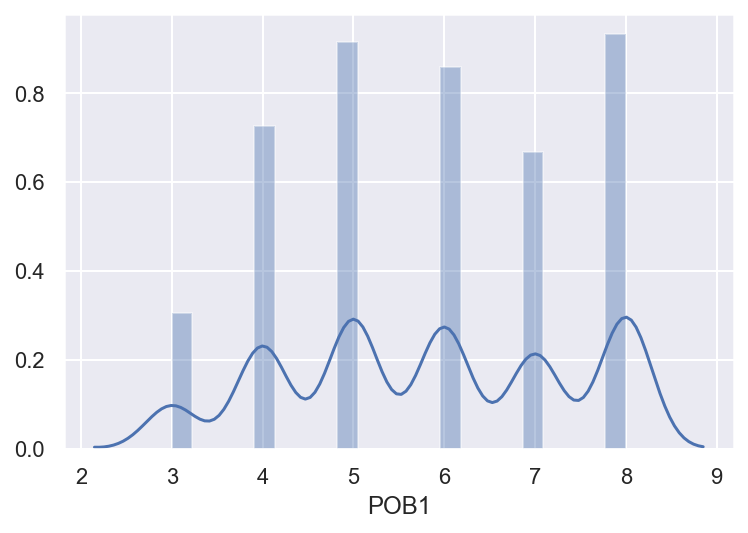

In [115]:
### Histograma de la edad ###
sns.distplot(df_cleaned['POB1'])

(array([ 357.,    0.,  850.,    0.,    0., 1071.,    0., 1006.,  783.,
        1092.]),
 array([1.09861229, 1.19669521, 1.29477814, 1.39286106, 1.49094399,
        1.58902692, 1.68710984, 1.78519277, 1.88327569, 1.98135862,
        2.07944154]),
 <a list of 10 Patch objects>)

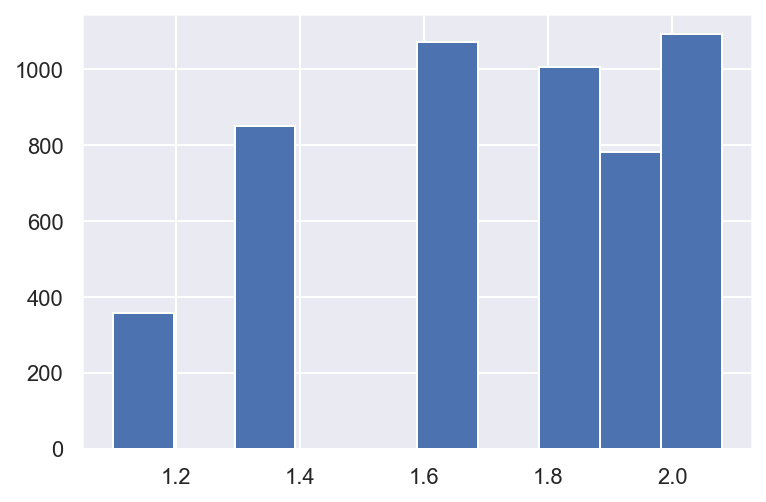

In [116]:
### Histograma ###
log_edad = np.log(df_cleaned['POB1'])
plt.hist(log_edad)

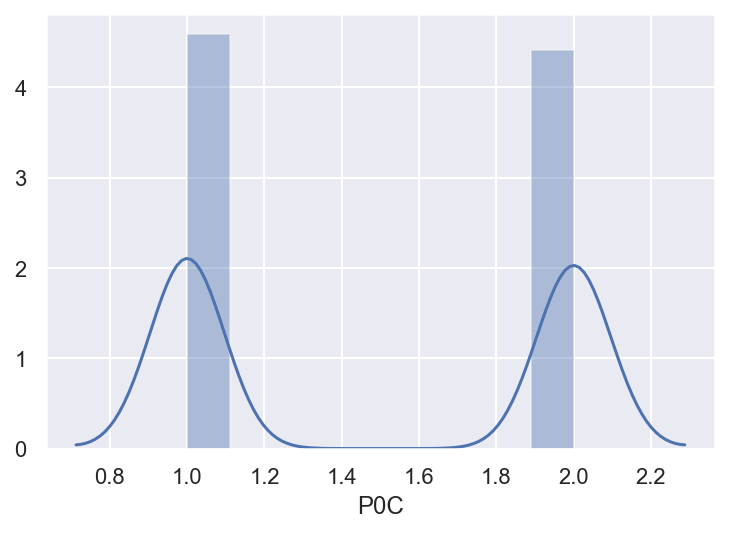

In [117]:
### Histograma del sexo ###
sns.distplot(df_cleaned['P0C'])

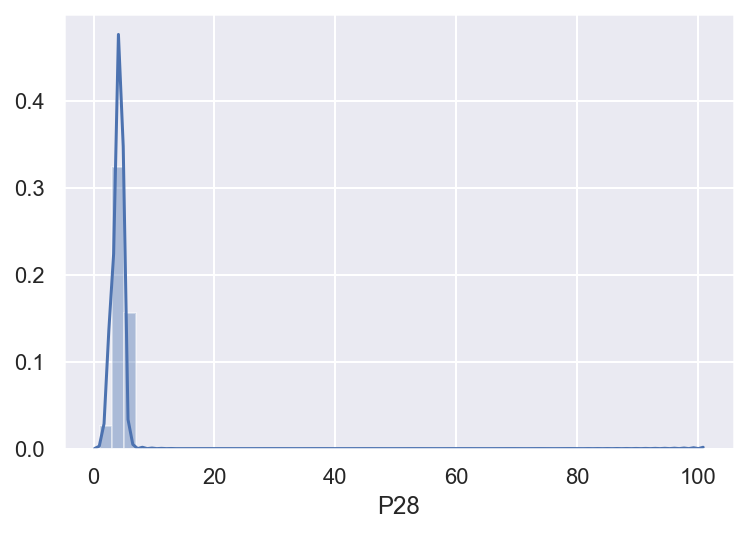

In [118]:
### Histograma Estado de Salud ###
sns.distplot(df_cleaned['P28'])

In [119]:
# print(*df_cleaned.columns.to_list(), sep=', ')
# print(df_cleaned.columns.to_list())

In [120]:
# df_cleaned= new_df[Datos]
df_cleaned.head()

,P0R1,P0B,POB1,P0C,P3,P4,P5,P6,P7,P8,...,P46,DB0,DB1,DB3,DB4,DB5,DB6,DB7,DB8,P23
0,9,4,4,1,1.0,1.0,1.0,5.0,2.0,1.0,...,7,4,2,1,4,2,2,1,3,1
1,3,5,6,1,1.0,1.0,2.0,5.0,1.0,2.0,...,8,3,4,5,5,1,1,1,1,1
2,4,5,8,2,1.0,1.0,2.0,5.0,2.0,1.0,...,9,2,4,100,100,4,5,1,4,1
3,5,5,7,2,1.0,1.0,1.0,5.0,2.0,2.0,...,11,3,1,100,100,2,3,1,3,1
4,5,5,6,2,1.0,1.0,1.0,5.0,2.0,1.0,...,9,3,1,3,5,2,3,1,3,1


In [121]:
# df_cleaned.shape

In [122]:
# df_cleaned.dtypes

In [123]:
# df_cleaned.isnull().sum()

In [11]:
df_cleaned.describe()

,P0R1,P0B,POB1,P0C,P3,P4,P5,P6,P7,P8,...,P46,DB0,DB1,DB3,DB4,DB5,DB6,DB7,DB8,P23
count,5159.000000,5159.000000,5159.000000,5159.000000,5159.000000,5159.000000,5159.000000,5159.000000,5159.000000,5159.000000,...,5159.000000,5159.000000,5159.000000,5159.000000,5159.000000,5159.000000,5159.000000,5159.000000,5159.000000,5159.000000
mean,8.170576,3.560380,5.830393,1.490599,2.237643,1.881179,2.444854,5.043807,2.396395,1.900950,...,8.680364,2.895910,2.659624,25.786393,33.153324,2.328552,2.825160,1.041481,2.353557,1.065710
std,5.048003,1.758982,1.568310,0.499960,9.893154,7.223864,9.208899,4.409402,7.541617,6.417858,...,3.938258,2.830794,6.139870,41.104046,43.922112,5.984180,6.473831,0.199419,7.049362,0.247799
min,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
25%,3.000000,2.000000,5.000000,1.000000,1.000000,1.000000,1.000000,5.000000,1.000000,1.000000,...,8.000000,2.000000,1.000000,2.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,9.000000,4.000000,6.000000,1.000000,1.000000,1.000000,1.000000,5.000000,2.000000,1.000000,...,9.000000,3.000000,1.000000,4.000000,5.000000,2.000000,2.000000,1.000000,2.000000,1.000000
75%,13.000000,5.000000,7.000000,2.000000,1.000000,1.000000,2.000000,5.000000,2.000000,2.000000,...,10.000000,3.000000,4.000000,5.000000,99.000000,2.000000,3.000000,1.000000,3.000000,1.000000
max,19.000000,6.000000,8.000000,2.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,2.000000,100.000000,2.000000


In [61]:
### Eliminamos las variables nominales para realizar la matriz de correlaciones,
### dejando solo las ordinales y las dicotómicas ###

print('Antes de eliminar las variables nominales ', df_cleaned.shape)
df_without_nominales = df_cleaned.drop(columns=['P0R1','P0C','P6','P9','P13','DB1','DB5'])
print('Despues de eliminar las variables correladas ', df_without_nominales.shape)

Antes de eliminar las variables nominales  (5159, 53)
Despues de eliminar las variables correladas  (5159, 46)


,P0B,POB1,P3,P4,P5,P7,P8,P11,P15A,P16A,...,P41,P43,P46,DB0,DB3,DB4,DB6,DB7,DB8,P23
P0B,1.000000,0.020072,0.001049,0.045639,-0.009272,-0.000238,0.043731,-0.016987,-0.018716,-0.005132,...,-0.013326,0.000622,-0.038387,0.058840,0.009054,-0.005269,-0.023834,0.009841,-0.077258,0.005347
POB1,0.020072,1.000000,-0.013601,0.022152,0.133392,-0.015974,0.066052,0.381358,0.008925,-0.018015,...,-0.017626,0.011858,-0.136425,-0.399981,0.089617,-0.082659,0.610244,-0.087081,-0.280270,-0.005282
P3,0.001049,-0.013601,1.000000,0.419819,0.372549,0.118885,0.313168,-0.043227,-0.198154,-0.245334,...,-0.000984,-0.038983,-0.039561,-0.077573,-0.005585,-0.000338,0.010358,0.020960,0.026315,0.138608
P4,0.045639,0.022152,0.419819,1.000000,0.388475,0.099336,0.640485,-0.019391,-0.165018,-0.196265,...,-0.030705,-0.024927,-0.028393,-0.057501,0.025308,0.022380,0.026062,0.001467,-0.015772,0.136941
P5,-0.009272,0.133392,0.372549,0.388475,1.000000,0.171868,0.508904,-0.008458,-0.162000,-0.186428,...,0.012357,-0.030450,-0.057509,-0.099109,0.166697,0.118100,0.105486,0.017614,-0.043836,0.123000
P7,-0.000238,-0.015974,0.118885,0.099336,0.171868,1.000000,0.153690,0.001331,-0.025975,-0.051574,...,0.046104,0.012993,0.054519,0.012641,0.087024,0.086881,-0.028854,-0.026540,0.012212,0.045564
P8,0.043731,0.066052,0.313168,0.640485,0.508904,0.153690,1.000000,-0.030268,-0.161551,-0.192637,...,-0.029845,-0.024136,-0.040707,-0.094336,0.057579,0.045574,0.056697,-0.003712,-0.013388,0.130279
P11,-0.016987,0.381358,-0.043227,-0.019391,-0.008458,0.001331,-0.030268,1.000000,0.031059,0.024663,...,0.023642,0.026352,-0.024837,-0.181288,0.060316,0.018224,0.250645,-0.011996,-0.138126,0.011566
P15A,-0.018716,0.008925,-0.198154,-0.165018,-0.162000,-0.025975,-0.161551,0.031059,1.000000,0.394440,...,0.133177,0.283282,0.087582,0.030859,0.003234,0.013643,0.033199,-0.023984,0.040756,-0.243416
P16A,-0.005132,-0.018015,-0.245334,-0.196265,-0.186428,-0.051574,-0.192637,0.024663,0.394440,1.000000,...,0.082831,0.153772,0.084405,0.037898,0.003030,0.007532,0.000175,-0.003148,-0.003538,-0.226593


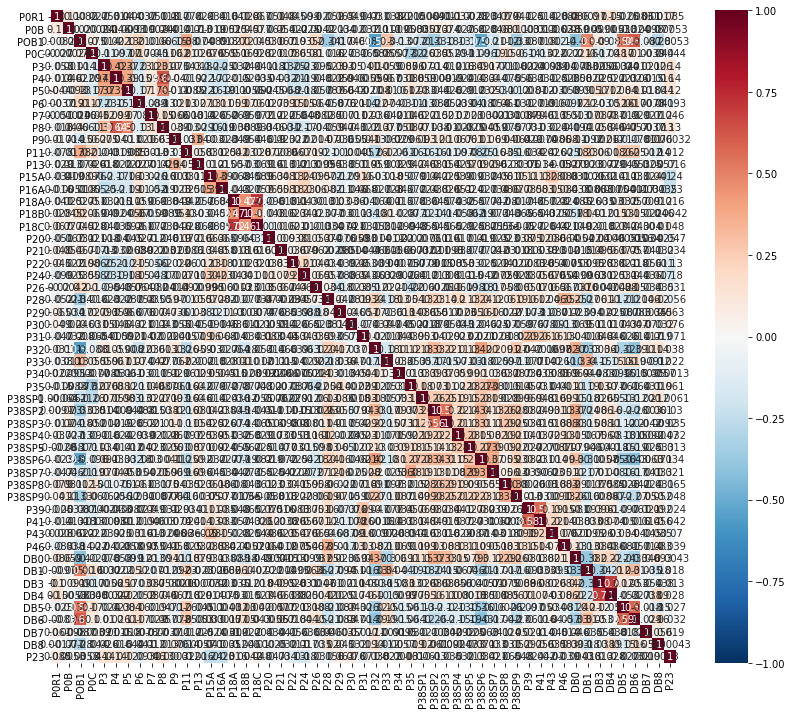

In [62]:
### Relaciones entre las features ###
correlation_spearman = df_without_nominales.corr(method = "spearman")
display(correlation_spearman)
plt.figure(figsize=(14, 12))
import seaborn as sns
heatmap = sns.heatmap(correlation, annot=True, linewidths=0, vmin=-1, cmap="RdBu_r")


In [64]:
correlation_spearman.to_excel(r'C:/Users/user/Google Drive/Saturdays.AI/PROYECTO/Datos/correlation_spearman.xlsx', engine ='openpyxl')


In [65]:
print('Antes de eliminar las variables correladas ', df_cleaned.shape)
df_without_correlations = df_cleaned.drop(columns=["P4","P5","P6","P11","P16A","P18B","P18C","P32","P38SP3","P38SP6","DB3","DB4","DB6"])
print('Despues de eliminar las variables correladas ', df_without_correlations.shape)

Antes de eliminar las variables correladas  (5159, 53)
Despues de eliminar las variables correladas  (5159, 40)


In [128]:
df_without_correlations["P23"].value_counts()

1    4820
2     339
Name: P23, dtype: int64

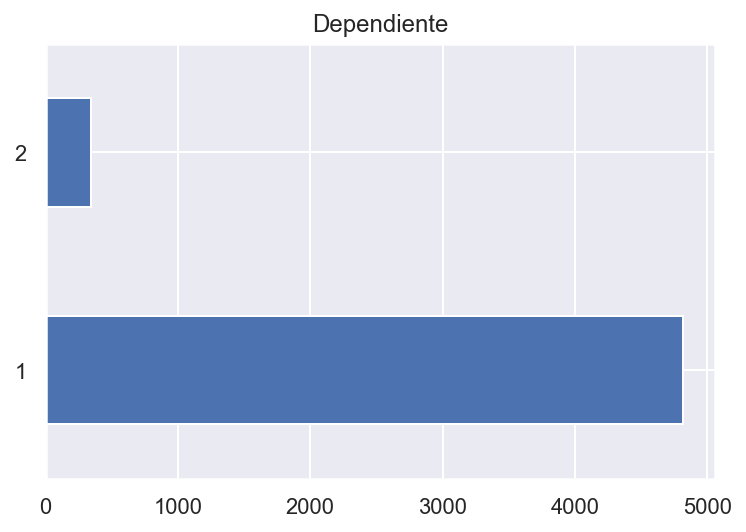

In [129]:
plot= df_without_correlations["P23"].value_counts().plot(kind='barh', title="Dependiente") 

# Análisis de componentes principales (PCA)

### Nota:
Con el análisis de componentes principales se obtienen tantos componentes como dimensiones (número de variables) tengan los datos de entrada. Los componentes se ordenan de mayor a menor en función de la cantidad de varianza explicada por cada uno, y estan formados por una combinación específica de las variables originales.

Junto al PCA, también añado un SparsePCA, en la documentación de scikit-learn podemos entender por qué esto podría ser interesante para la selección de variables:

> "Principal component analysis (PCA) has the disadvantage that the components extracted by this method have exclusively dense expressions, i.e. they have non-zero coefficients when expressed as linear combinations of the original variables. This can make interpretation difficult. (...)
> Sparse principal components yields a more parsimonious, interpretable representation, clearly emphasizing which of the original features contribute to the differences between samples."

[Referencia](https://scikit-learn.org/stable/modules/decomposition.html#sparse-principal-components-analysis-sparsepca-and-minibatchsparsepca)

In [130]:
RANDOM_STATE = 17  # Semilla para generar número aleatorio
scaler = StandardScaler()  # Estandarizamos los datos

# Seleccionamos el mínimo número de componentes para cubrir el 50% de la varianza:
pca = PCA(n_components=0.5, random_state=RANDOM_STATE)
# El parámetro alfa controla la «escasez» de componentes:
spar_pca = SparsePCA(alpha=0.2, random_state=RANDOM_STATE)

scaled_data = scaler.fit_transform(df_without_correlations.drop('P23', axis=1))
pca.fit(scaled_data)
spar_pca.fit(scaled_data)

num_components = pca.n_components_

print("Número total de componentes que explican el 50 pct de la varianza: %d" % num_components)
print("Porcentaje de varianza explicado por cada uno de los %d primeros componentes: \n" % num_components + str(pca.explained_variance_ratio_*100))

Número total de componentes que explican el 50 pct de la varianza: 13
Porcentaje de varianza explicado por cada uno de los 13 primeros componentes: 
[9.57781522 5.95071388 4.65916242 3.89898284 3.79133758 3.42695036
 3.20665866 3.08461727 3.07117756 2.94762942 2.79554499 2.73843585
 2.67731787]


        pc1       pc2       pc3       pc4       pc5       pc6       pc7  \
0  1.092126 -0.276732 -0.302652  0.226302  0.557933 -0.225795  0.429028   
1 -0.147205  0.202944  0.551919  0.394666 -1.594985  0.978674 -0.997433   
2 -0.708227  0.315577  1.409992 -1.253440 -2.220214  1.013404 -0.643772   
3 -1.059845 -0.028962  0.255531 -0.777038 -0.176551 -0.680967  0.281766   
4  0.326394 -0.417950 -0.073560 -0.706610 -0.039699 -0.587627  0.075359   

        pc8       pc9      pc10      pc11      pc12      pc13  
0 -0.109771 -0.539468 -0.104974 -0.661627  0.174312  0.423598  
1  1.029196  1.005693  0.001205  1.338827 -0.539597  1.435847  
2  0.430157  1.976864  0.864224  0.560500 -0.570094  1.617896  
3 -0.268890  0.507800  0.094088  0.256983  0.638003 -0.257497  
4 -0.101858 -0.036599 -0.292477  0.541239 -0.127828 -0.519172  


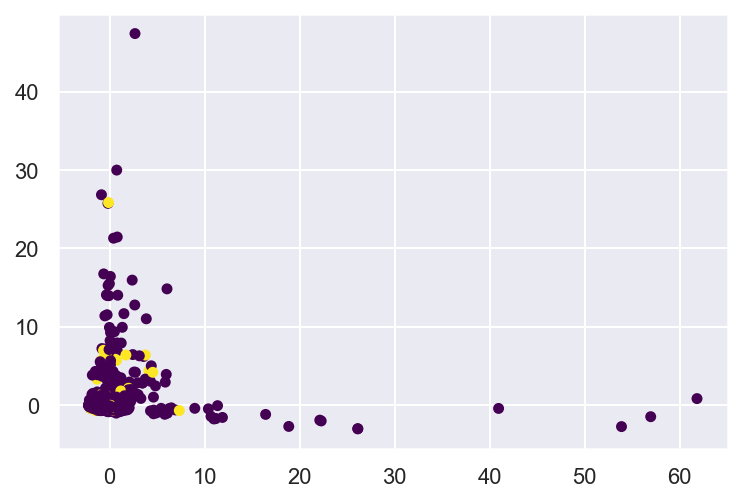

In [131]:
# Generamos un data frame con los Componentes Principales obtenidos
columns = ["pc%d" % i for i in range(1, pca.n_components_+1)]
pca_df = pd.DataFrame(data = pca.transform(scaled_data), columns = columns)
print(pca_df.head())

# Visualizamos la proyección de la variable objetivo en los dos primeros componentes principales
plt.scatter(pca_df['pc1'], pca_df['pc2'], c=df_without_correlations['P23'].to_numpy(), s=20, cmap='viridis')

In [132]:
pca_components = pca.components_
spar_pca_components = spar_pca.components_

for i in range(num_components):
    print("\nContribución de las variables para los PCA y SparsePCA:")
    print("PCA"+str(i)+"\n"+str(pca_components[i])+"\n"+str(spar_pca_components[i]))
#     print("Norma del componente: %f" % np.linalg.norm(pca_components[i]))


Contribución de las variables para los PCA y SparsePCA:
PCA0
[ 0.01497119  0.0033732  -0.09260038 -0.02963501  0.00197141  0.06445607
  0.01003466  0.00823281 -0.01967416 -0.00455102 -0.05006863 -0.00251907
  0.02305315  0.00449978  0.00319141  0.09464963  0.05106363  0.06190581
  0.05880188  0.00923476 -0.0102125   0.12376473  0.06670037  0.36096807
  0.38943809  0.32798524  0.3923208   0.38879039  0.35153612  0.31593135
  0.00509401  0.00893042  0.00265588  0.01575071  0.04475476  0.0121826
  0.13616135  0.00154007  0.06809309]
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.]

Contribución de las variables para los PCA y SparsePCA:
PCA1
[ 0.01394175  0.00355728  0.03292817 -0.00701708  0.06164911  0.09175088
  0.03424385  0.06085734  0.02790247  0.17915546 -0.02614746  0.138168
  0.04967203  0.0794878   0.06386651  0.09062655 -0.00308176  0.04058731
  0.01573088  0.28165   

In [133]:
print("Indices distintos de 0: " + str(np.nonzero(spar_pca_components)[1][:num_components+2]))
variable_list = df_without_correlations.columns[np.nonzero(spar_pca_components)[1][:num_components+2]]
print("\nLista de variables seleccionadas con la configuración actual:\n" + str(variable_list))
df_pca_vars = df_without_correlations[variable_list]
df_pca_vars.head()

Indices distintos de 0: [23 30 35 22  5 13 34  2 13 34 19 33  0 10 29]

Lista de variables seleccionadas con la configuración actual:
Index(['P38SP1', 'P39', 'DB1', 'P35', 'P7', 'P22', 'DB0', 'POB1', 'P22', 'DB0',
       'P31', 'P46', 'P0R1', 'P18A', 'P38SP9'],
      dtype='object')


,P38SP1,P39,DB1,P35,P7,P22,DB0,POB1,P22,DB0,P31,P46,P0R1,P18A,P38SP9
0,7,2,2,1,2.0,2.0,4,4,2.0,4,2,7,9,9,7
1,1,2,4,4,1.0,2.0,3,6,2.0,3,2,8,3,7,7
2,1,2,4,1,2.0,2.0,2,8,2.0,2,2,9,4,7,1
3,1,2,1,1,2.0,2.0,3,7,2.0,3,2,11,5,6,4
4,1,1,1,2,2.0,2.0,3,6,2.0,3,2,9,5,4,7


# Creación de los conjuntos de Train y Test

In [134]:
y = df_without_correlations['P23']
X = df_without_correlations.drop('P23', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

In [135]:
print('X train Shape: ' , X_train.shape, '; Y train Shape: ' , y_train.shape)
print('X test Shape: ' , X_test.shape, '; Y test Shape: ' , y_test.shape)

X train Shape:  (3611, 39) ; Y train Shape:  (3611,)
X test Shape:  (1548, 39) ; Y test Shape:  (1548,)


# Generación de datos sintéticos

In [136]:
### Balanceo SMOTE ###
from imblearn.combine import SMOTETomek

os_us = SMOTETomek()
X_train_balanced_result, y_train_balanced_result = os_us.fit_sample(X_train, y_train)

print ("Distribution of class labels before resampling {}".format(Counter(y_train)))
print ("Distribution of class labels after resampling {}".format(Counter(y_train_balanced_result)))

Distribution of class labels before resampling Counter({1: 3382, 2: 229})
Distribution of class labels after resampling Counter({1: 3380, 2: 3380})


In [137]:
print(type(X_train_balanced_result))
print(type(y_train_balanced_result))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [138]:
X_train_balanced = pd.DataFrame(data=X_train_balanced_result, columns=X_train.columns)
y_train_balanced = pd.Series(data=y_train_balanced_result)   
# values | 1st column as index | 1st row as the column names

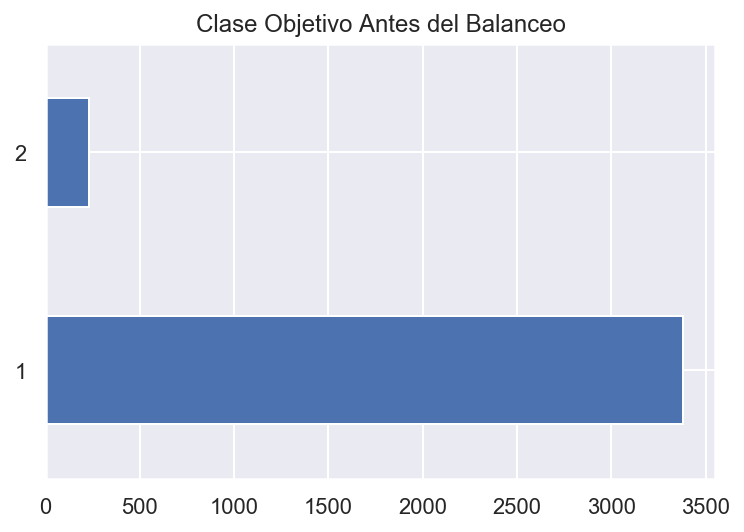

In [139]:
plot= y_train.value_counts().plot(kind='barh', title="Clase Objetivo Antes del Balanceo") 

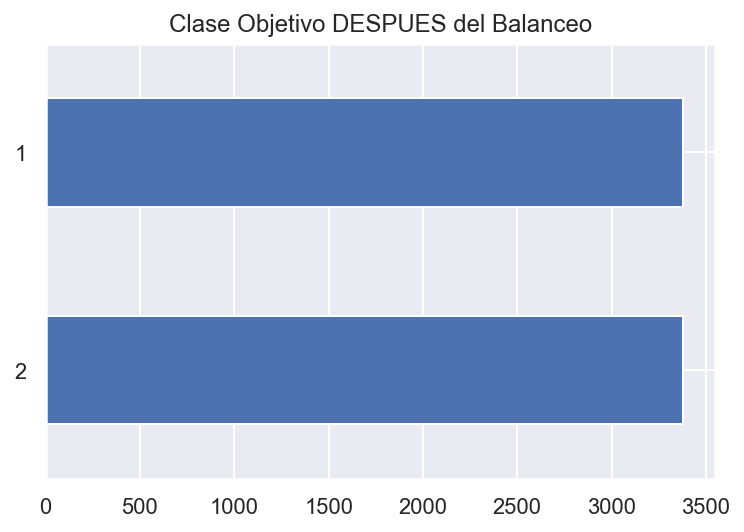

In [140]:
plot= y_train_balanced.value_counts().plot(kind='barh', title="Clase Objetivo DESPUES del Balanceo") 

# Selección de variables

## Boruta

In [141]:
X_train_for_boruta=np.matrix(X_train)
y_train_for_boruta=np.transpose(np.ravel(np.matrix(y_train), order='C'))

rf = RandomForestClassifier(n_jobs=-1, class_weight='balanced', max_depth=5)

In [142]:
boruta_selector = boruta.BorutaPy(rf, n_estimators='auto', verbose=2, random_state=4242, max_iter = 50, perc = 90)
boruta_selector.fit(X_train_for_boruta, np.ravel(y_train_for_boruta, order='C'))

Iteration: 	1 / 50
Confirmed: 	0
Tentative: 	39
Rejected: 	0
Iteration: 	2 / 50
Confirmed: 	0
Tentative: 	39
Rejected: 	0
Iteration: 	3 / 50
Confirmed: 	0
Tentative: 	39
Rejected: 	0
Iteration: 	4 / 50
Confirmed: 	0
Tentative: 	39
Rejected: 	0
Iteration: 	5 / 50
Confirmed: 	0
Tentative: 	39
Rejected: 	0
Iteration: 	6 / 50
Confirmed: 	0
Tentative: 	39
Rejected: 	0
Iteration: 	7 / 50
Confirmed: 	0
Tentative: 	39
Rejected: 	0
Iteration: 	8 / 50
Confirmed: 	9
Tentative: 	14
Rejected: 	16
Iteration: 	9 / 50
Confirmed: 	9
Tentative: 	14
Rejected: 	16
Iteration: 	10 / 50
Confirmed: 	9
Tentative: 	14
Rejected: 	16
Iteration: 	11 / 50
Confirmed: 	9
Tentative: 	14
Rejected: 	16
Iteration: 	12 / 50
Confirmed: 	9
Tentative: 	12
Rejected: 	18
Iteration: 	13 / 50
Confirmed: 	9
Tentative: 	12
Rejected: 	18
Iteration: 	14 / 50
Confirmed: 	9
Tentative: 	12
Rejected: 	18
Iteration: 	15 / 50
Confirmed: 	9
Tentative: 	12
Rejected: 	18
Iteration: 	16 / 50
Confirmed: 	9
Tentative: 	9
Rejected: 	21
Iteration

BorutaPy(alpha=0.05,
         estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                          class_weight='balanced',
                                          criterion='gini', max_depth=5,
                                          max_features='auto',
                                          max_leaf_nodes=None, max_samples=None,
                                          min_impurity_decrease=0.0,
                                          min_impurity_split=None,
                                          min_samples_leaf=1,
                                          min_samples_split=2,
                                          min_weight_fraction_leaf=0.0,
                                          n_estimators=101, n_jobs=-1,
                                          oob_score=False,
                                          random_state=RandomState(MT19937) at 0x1D8FD488,
                                          verbose=0, warm_start=Fals

In [143]:
boruta_selector.ranking_

array([ 1,  9, 19, 24,  1,  1,  1, 15,  8,  1,  1, 15, 22,  1,  1, 26,  5,
        3, 12, 25, 20, 22,  1, 18, 11,  3,  9,  7,  1,  5, 29, 26, 28,  2,
       21, 14, 17, 30, 13])

In [144]:
print('Se han seleccionado ',boruta_selector.n_features_, ' variable del total de ',X_train_balanced.shape[1])

Se han seleccionado  10  variable del total de  39


In [145]:
features_boruta = list()
indexes = np.where(boruta_selector.support_ == True)
for x in np.nditer(indexes):
    features_boruta.append(X_train_balanced.columns.tolist()[x])
print(features_boruta)

['P0R1', 'P3', 'P7', 'P8', 'P15A', 'P18A', 'P22', 'P24', 'P35', 'P38SP8']


In [146]:
executeWithBorutaVariables = True

# Entrenamiento y Evaluación de Modelos

## Regresión Logística

In [181]:
def mostrar_resultados(y_test, pred_y, title):
    conf_matrix = confusion_matrix(y_test, pred_y)
    plt.figure(figsize=(12, 12))
    sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
    plt.title(title)
    plt.ylabel('True class')
    plt.xlabel('Predicted class')
    plt.show()
    print (classification_report(y_test, pred_y))
    
#     Modelos de Regresión Lineal
def run_Logistic_Regression_model(X_train, X_test, y_train, y_test):
    clf_base = LogisticRegression(C=1.0,penalty='l2',random_state=1,solver="newton-cg")
    clf_base.fit(X_train, y_train)
    return clf_base


In [182]:
if executeWithBorutaVariables: 
  model_logistic_regression = run_Logistic_Regression_model(X_train_balanced[features_boruta], X_test[features_boruta], y_train_balanced, y_test)   
else :
  model_logistic_regression = run_Logistic_Regression_model(X_train_balanced, X_test, y_train_balanced, y_test)

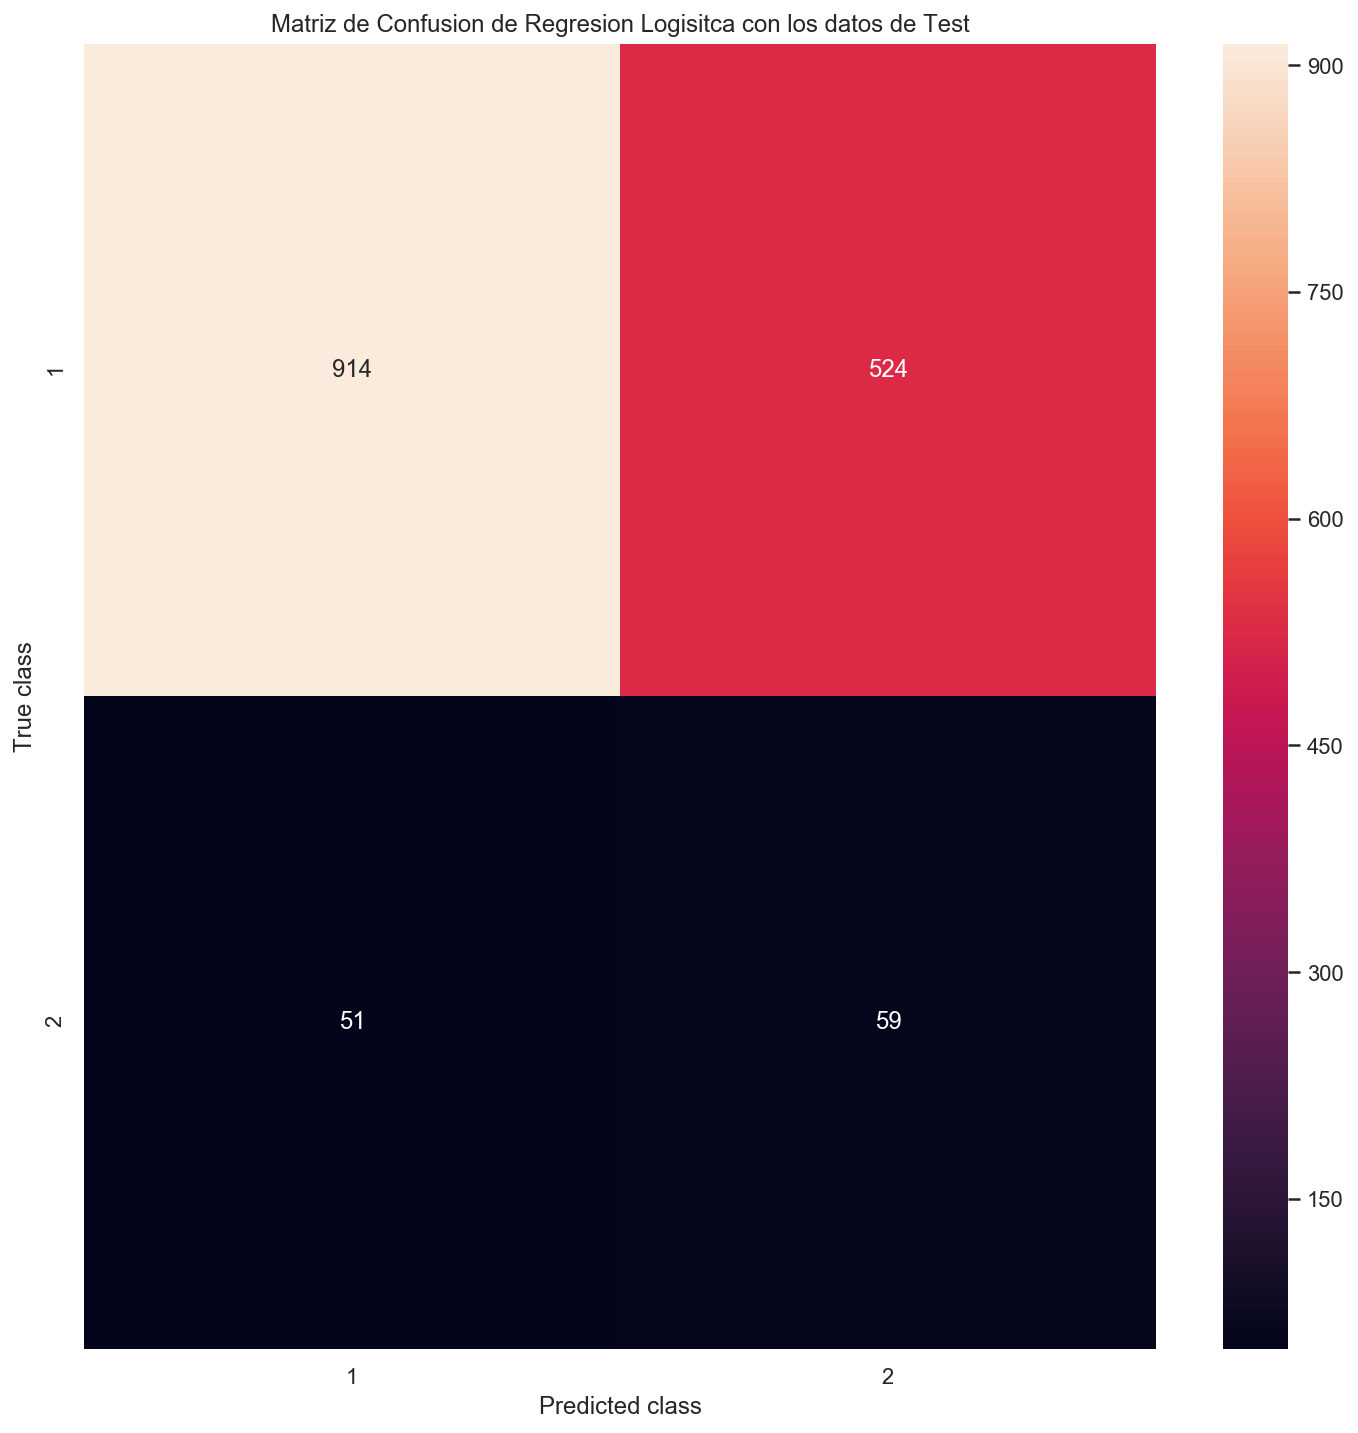

              precision    recall  f1-score   support

           1       0.95      0.64      0.76      1438
           2       0.10      0.54      0.17       110

    accuracy                           0.63      1548
   macro avg       0.52      0.59      0.47      1548
weighted avg       0.89      0.63      0.72      1548



In [183]:
if executeWithBorutaVariables:
  mostrar_resultados(y_test, model_logistic_regression.predict(X_test[features_boruta]), "Matriz de Confusion de Regresion Logisitca con los datos de Test")
else :
  mostrar_resultados(y_test, model_logistic_regression.predict(X_test), "Matriz de Confusion de Regresion Logisitca con los datos de Test")  

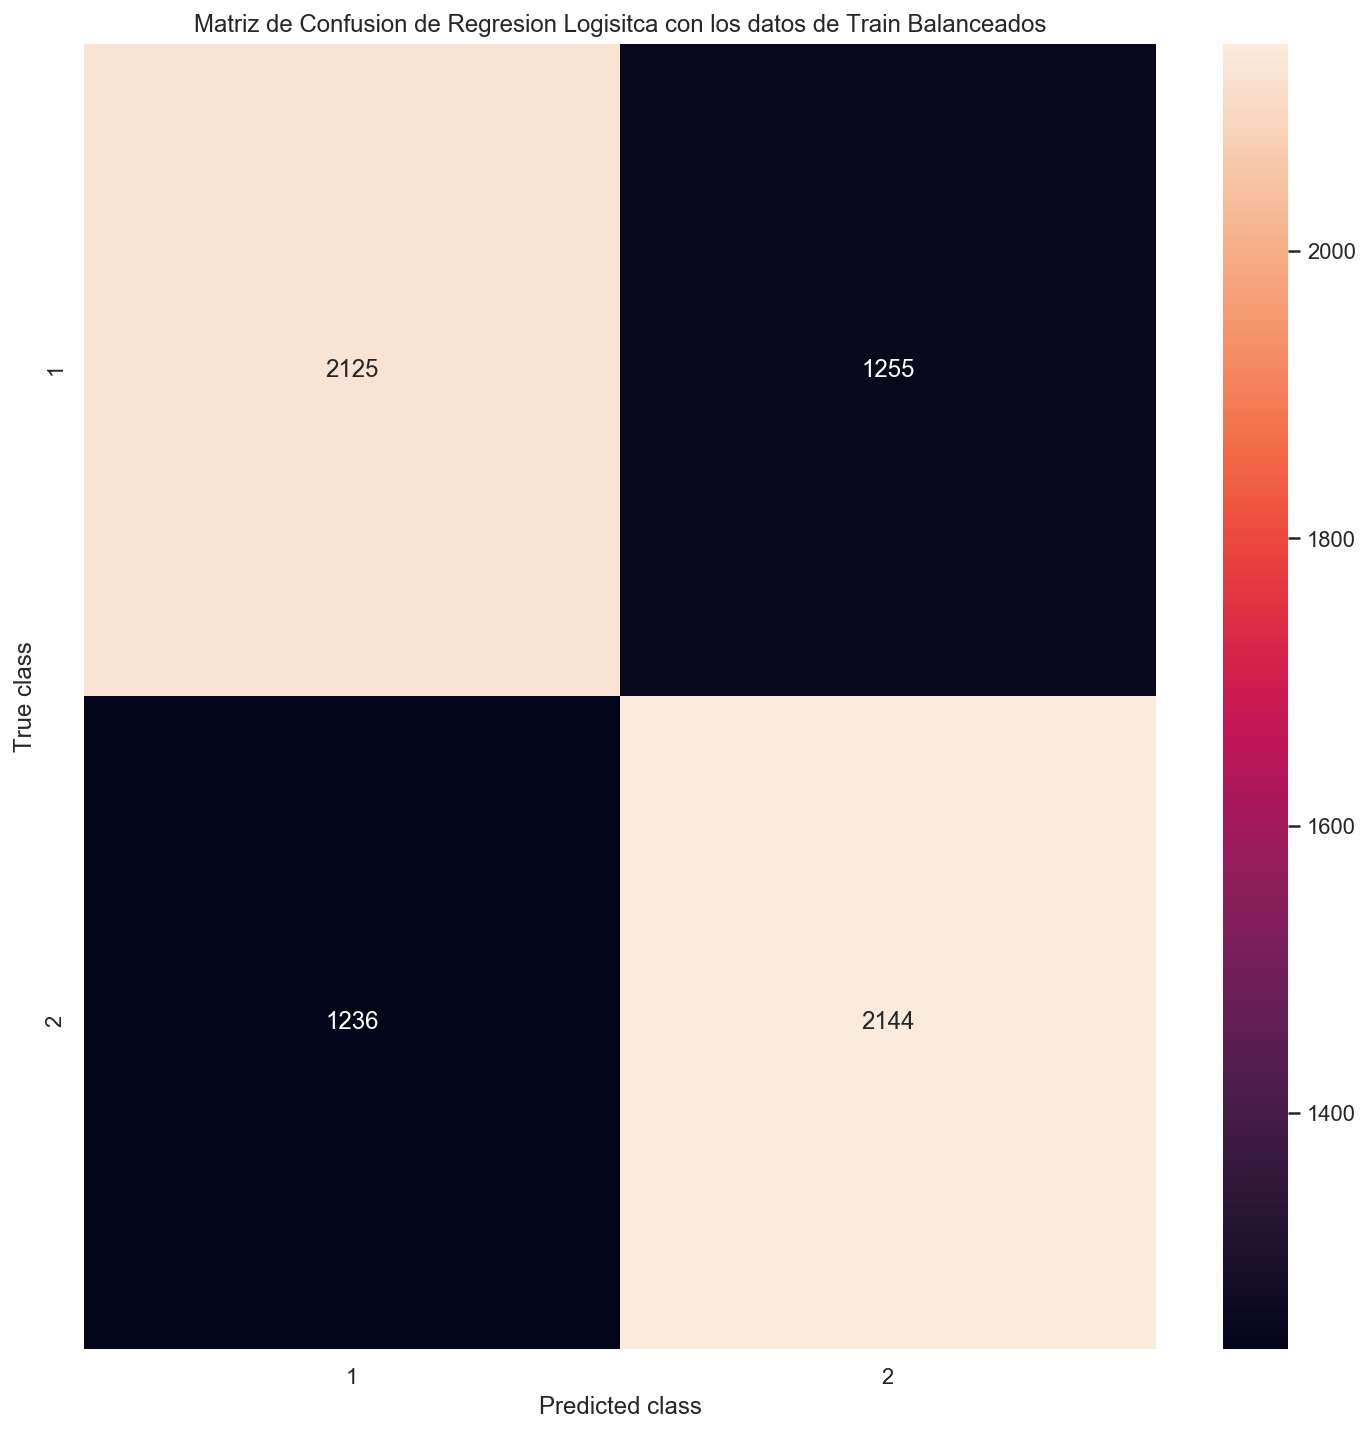

              precision    recall  f1-score   support

           1       0.63      0.63      0.63      3380
           2       0.63      0.63      0.63      3380

    accuracy                           0.63      6760
   macro avg       0.63      0.63      0.63      6760
weighted avg       0.63      0.63      0.63      6760



In [150]:
if executeWithBorutaVariables:
  mostrar_resultados(y_train_balanced, model_logistic_regression.predict(X_train_balanced[features_boruta]), "Matriz de Confusion de Regresion Logisitca con los datos de Train Balanceados")
else :
  mostrar_resultados(y_train_balanced, model_logistic_regression.predict(X_train_balanced), "Matriz de Confusion de Regresion Logisitca con los datos de Train Balanceados")

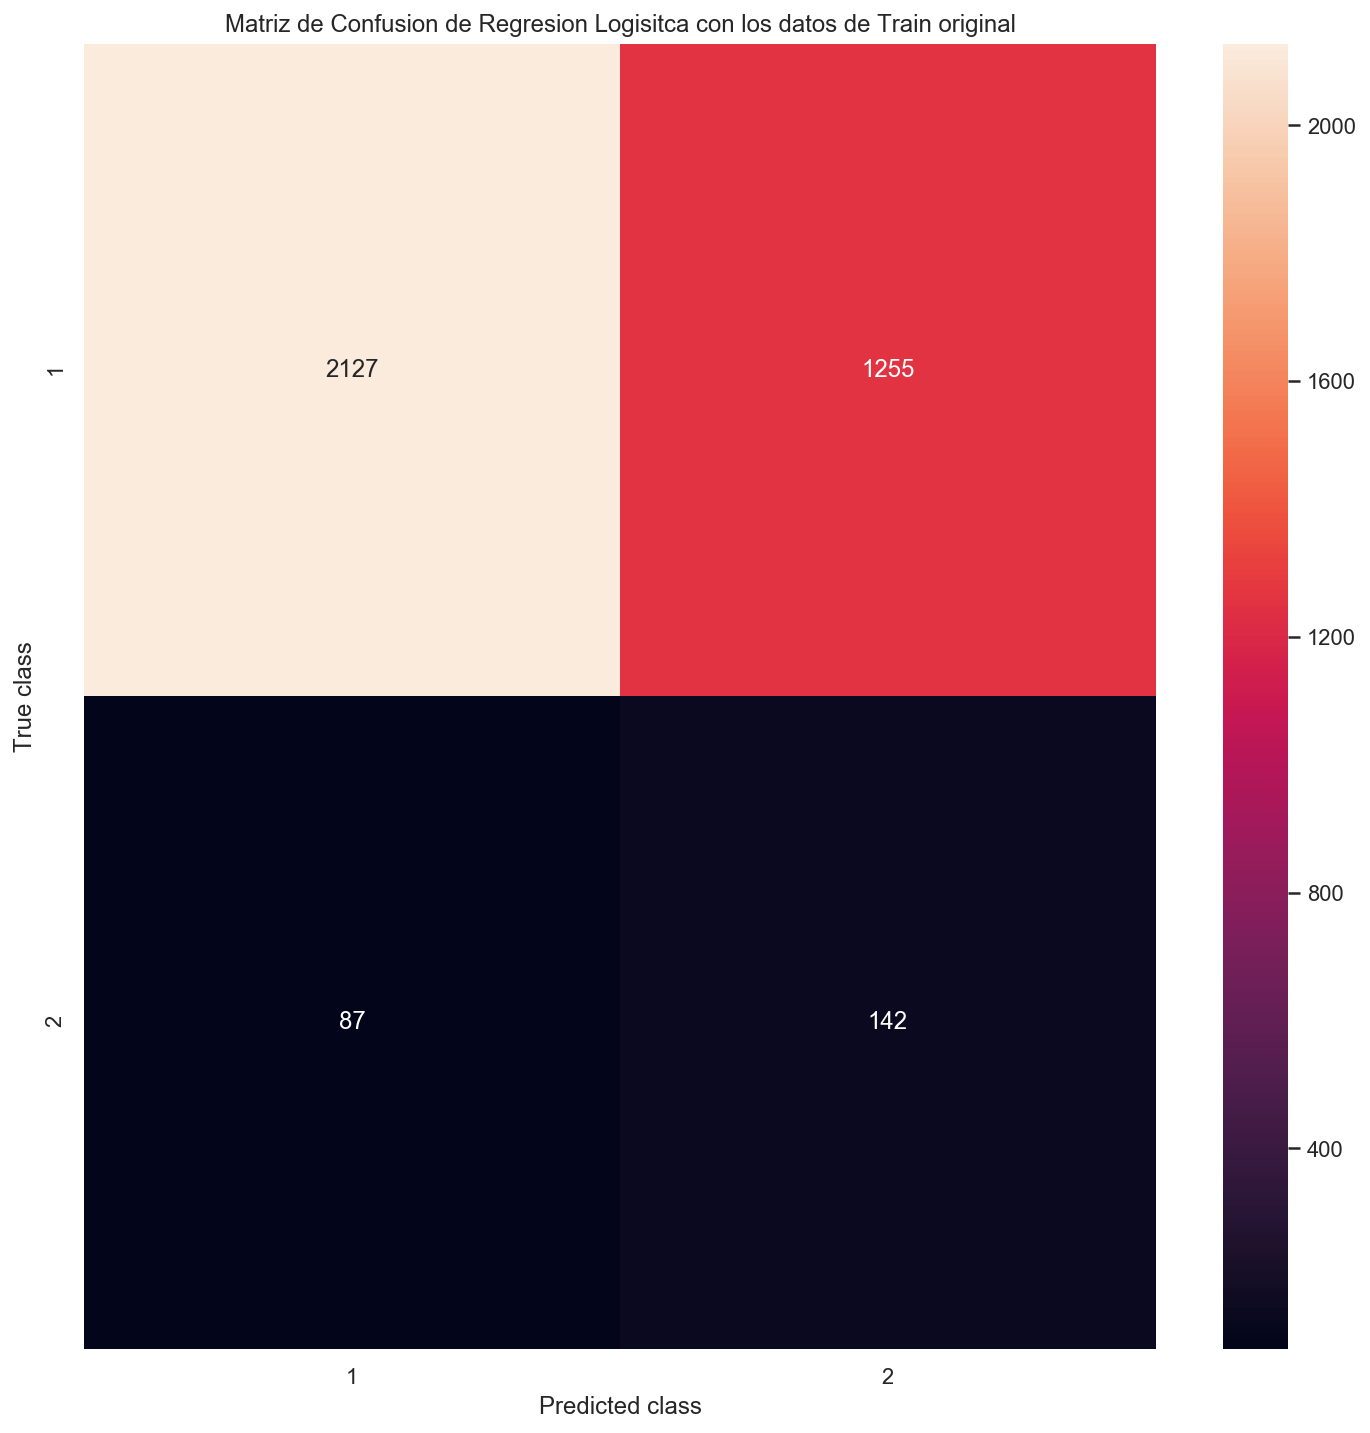

              precision    recall  f1-score   support

           1       0.96      0.63      0.76      3382
           2       0.10      0.62      0.17       229

    accuracy                           0.63      3611
   macro avg       0.53      0.62      0.47      3611
weighted avg       0.91      0.63      0.72      3611



In [151]:
if executeWithBorutaVariables:
  mostrar_resultados(y_train, model_logistic_regression.predict(X_train[features_boruta]), "Matriz de Confusion de Regresion Logisitca con los datos de Train original")
else :
  mostrar_resultados(y_train, model_logistic_regression.predict(X_train), "Matriz de Confusion de Regresion Logisitca con los datos de Train original")

## Random Forest

In [152]:
### Random Forest Classifier ###
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error

def get_mae_rf(num_est, predictors_train, predictors_val, targ_train, targ_val):
    
    # fitting model with input max_leaf_nodes
    model = RandomForestClassifier(n_estimators=num_est, random_state=0,  bootstrap = True,verbose=1,
                               max_features = 'sqrt')

    # fitting the model with training dataset
    model.fit(predictors_train, targ_train)

    # making prediction with the test dataset
    preds_val = model.predict(predictors_val)

    # calculate and return the MAE
    mae = mean_absolute_error(targ_val, preds_val)
    return(mae)

In [153]:
plot_mae = {}
for num_est  in range(2,50):
    if executeWithBorutaVariables:
      my_mae = get_mae_rf(num_est,X_train_balanced[features_boruta],X_test[features_boruta],y_train_balanced,y_test)
    else: 
      my_mae = get_mae_rf(num_est,X_train_balanced,X_test,y_train_balanced,y_test)
    plot_mae[num_est] = my_mae

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

[Parallel(n_jobs=1)]: Done  29 out of  29 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  29 out of  29 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  31 out of  31 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  31 out of  31 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Us

In [154]:
plot_mae = {}
for num_est  in range(2,50):
    my_mae = get_mae_rf(num_est,X_train_balanced,X_test,y_train_balanced,y_test)
    plot_mae[num_est] = my_mae

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  31 out of  31 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  31 out of  31 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Us

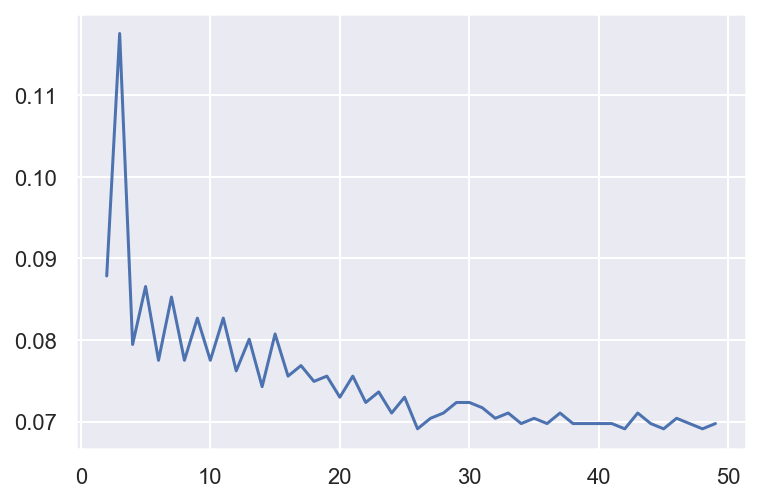

In [155]:
plt.plot(list(plot_mae.keys()),list(plot_mae.values()))
plt.show()

In [156]:
 # fitting model with input max_leaf_nodes
model_forest_classifier = RandomForestClassifier(n_estimators=10, random_state=0,  bootstrap = True,verbose=2, max_features = 'sqrt')

# fitting the model with training dataset
if executeWithBorutaVariables:
  model_forest_classifier.fit(X_train_balanced[features_boruta], y_train_balanced)
else :
  model_forest_classifier.fit(X_train_balanced, y_train_balanced)

building tree 1 of 10
building tree 2 of 10
building tree 3 of 10
building tree 4 of 10
building tree 5 of 10
building tree 6 of 10
building tree 7 of 10
building tree 8 of 10
building tree 9 of 10
building tree 10 of 10


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


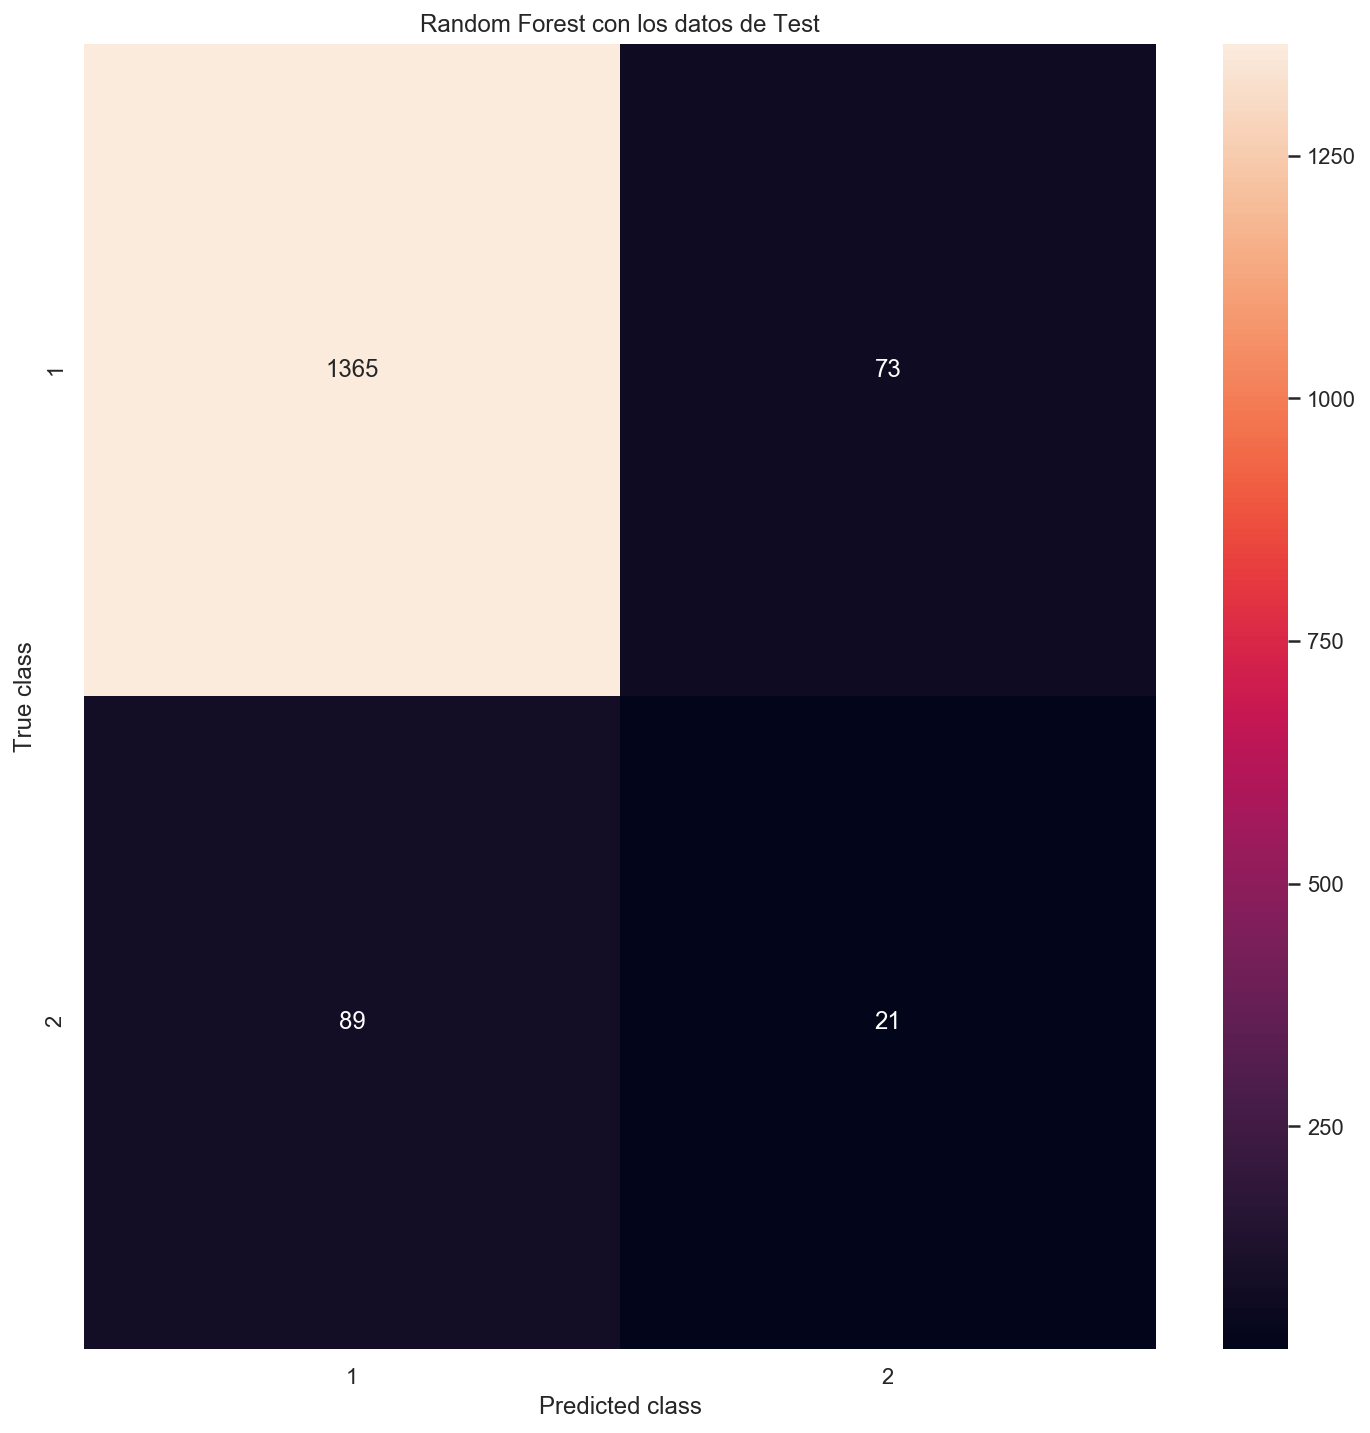

              precision    recall  f1-score   support

           1       0.94      0.95      0.94      1438
           2       0.22      0.19      0.21       110

    accuracy                           0.90      1548
   macro avg       0.58      0.57      0.57      1548
weighted avg       0.89      0.90      0.89      1548



In [157]:
if executeWithBorutaVariables:
  mostrar_resultados(y_test, model_forest_classifier.predict(X_test[features_boruta]), "Random Forest con los datos de Test")
else :
  mostrar_resultados(y_test, model_forest_classifier.predict(X_test), "Random Forest con los datos de Test")

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


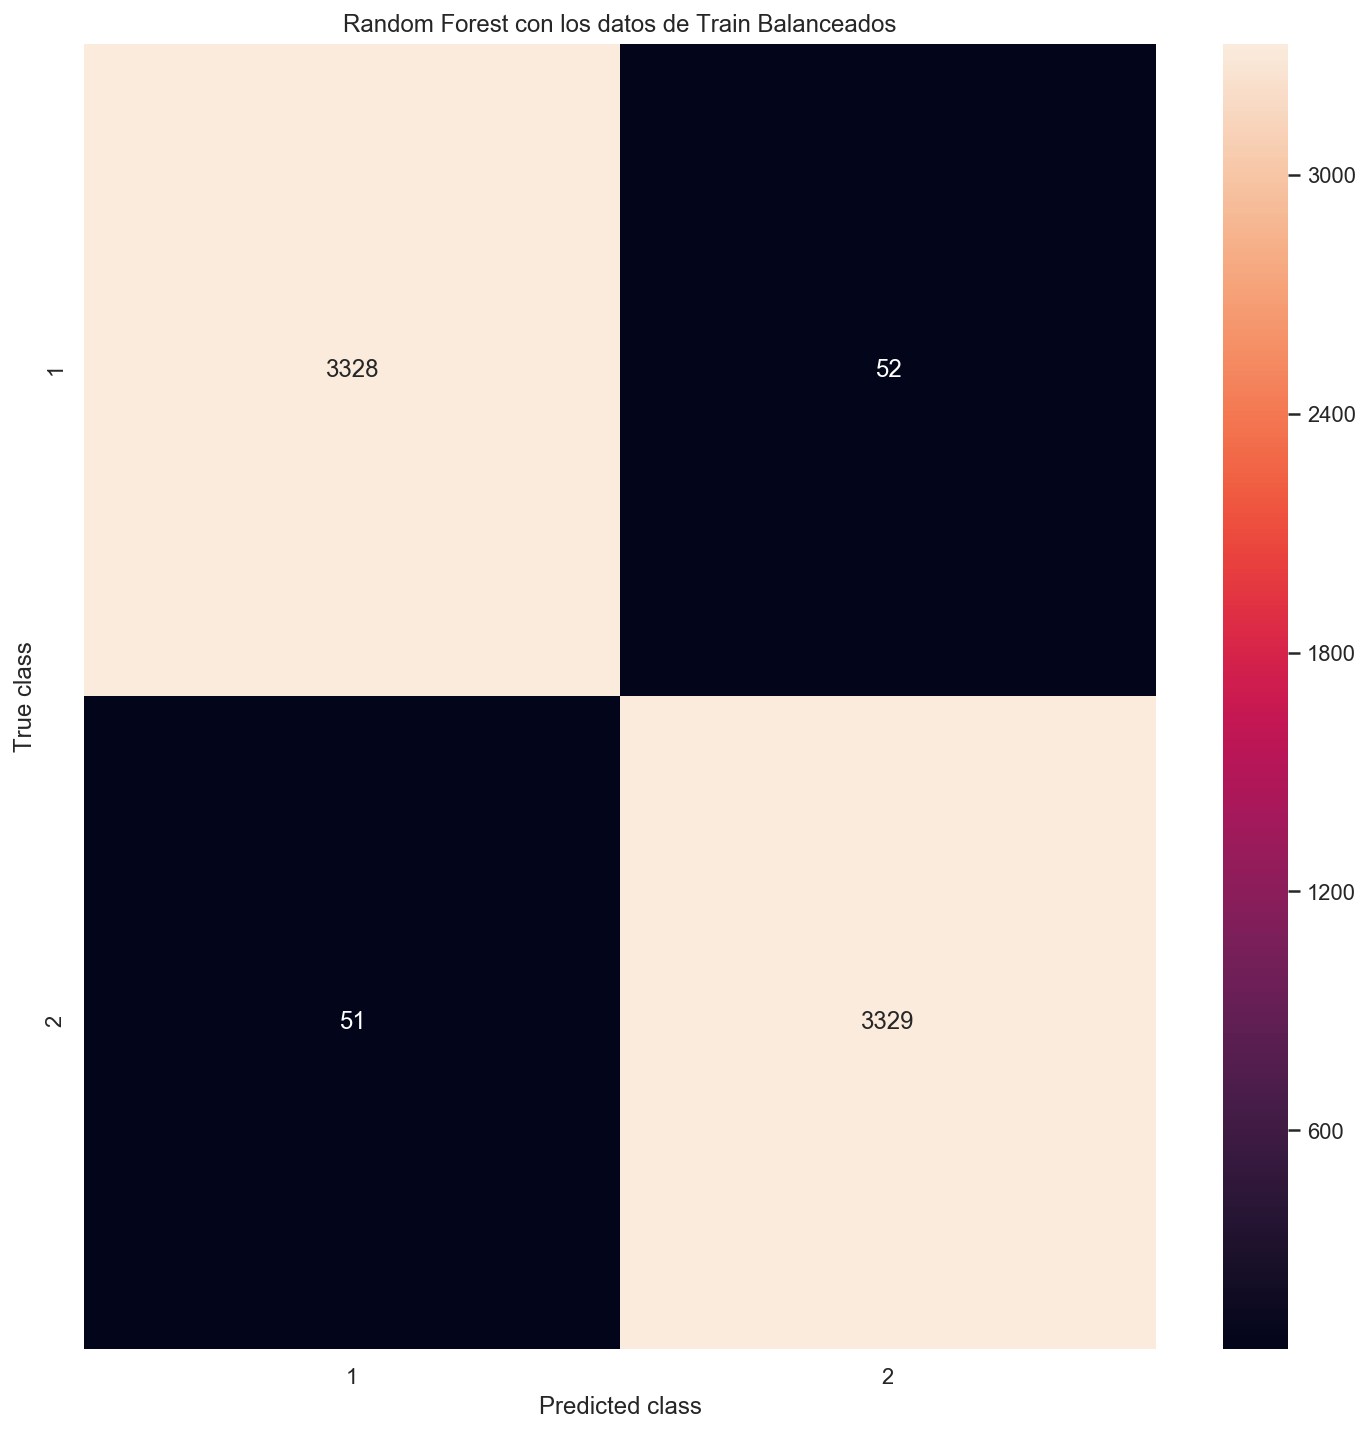

              precision    recall  f1-score   support

           1       0.98      0.98      0.98      3380
           2       0.98      0.98      0.98      3380

    accuracy                           0.98      6760
   macro avg       0.98      0.98      0.98      6760
weighted avg       0.98      0.98      0.98      6760



In [158]:
if executeWithBorutaVariables:
  mostrar_resultados(y_train_balanced, model_forest_classifier.predict(X_train_balanced[features_boruta]), "Random Forest con los datos de Train Balanceados")
else :
  mostrar_resultados(y_train_balanced, model_forest_classifier.predict(X_train_balanced), "Random Forest con los datos de Train Balanceados")

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


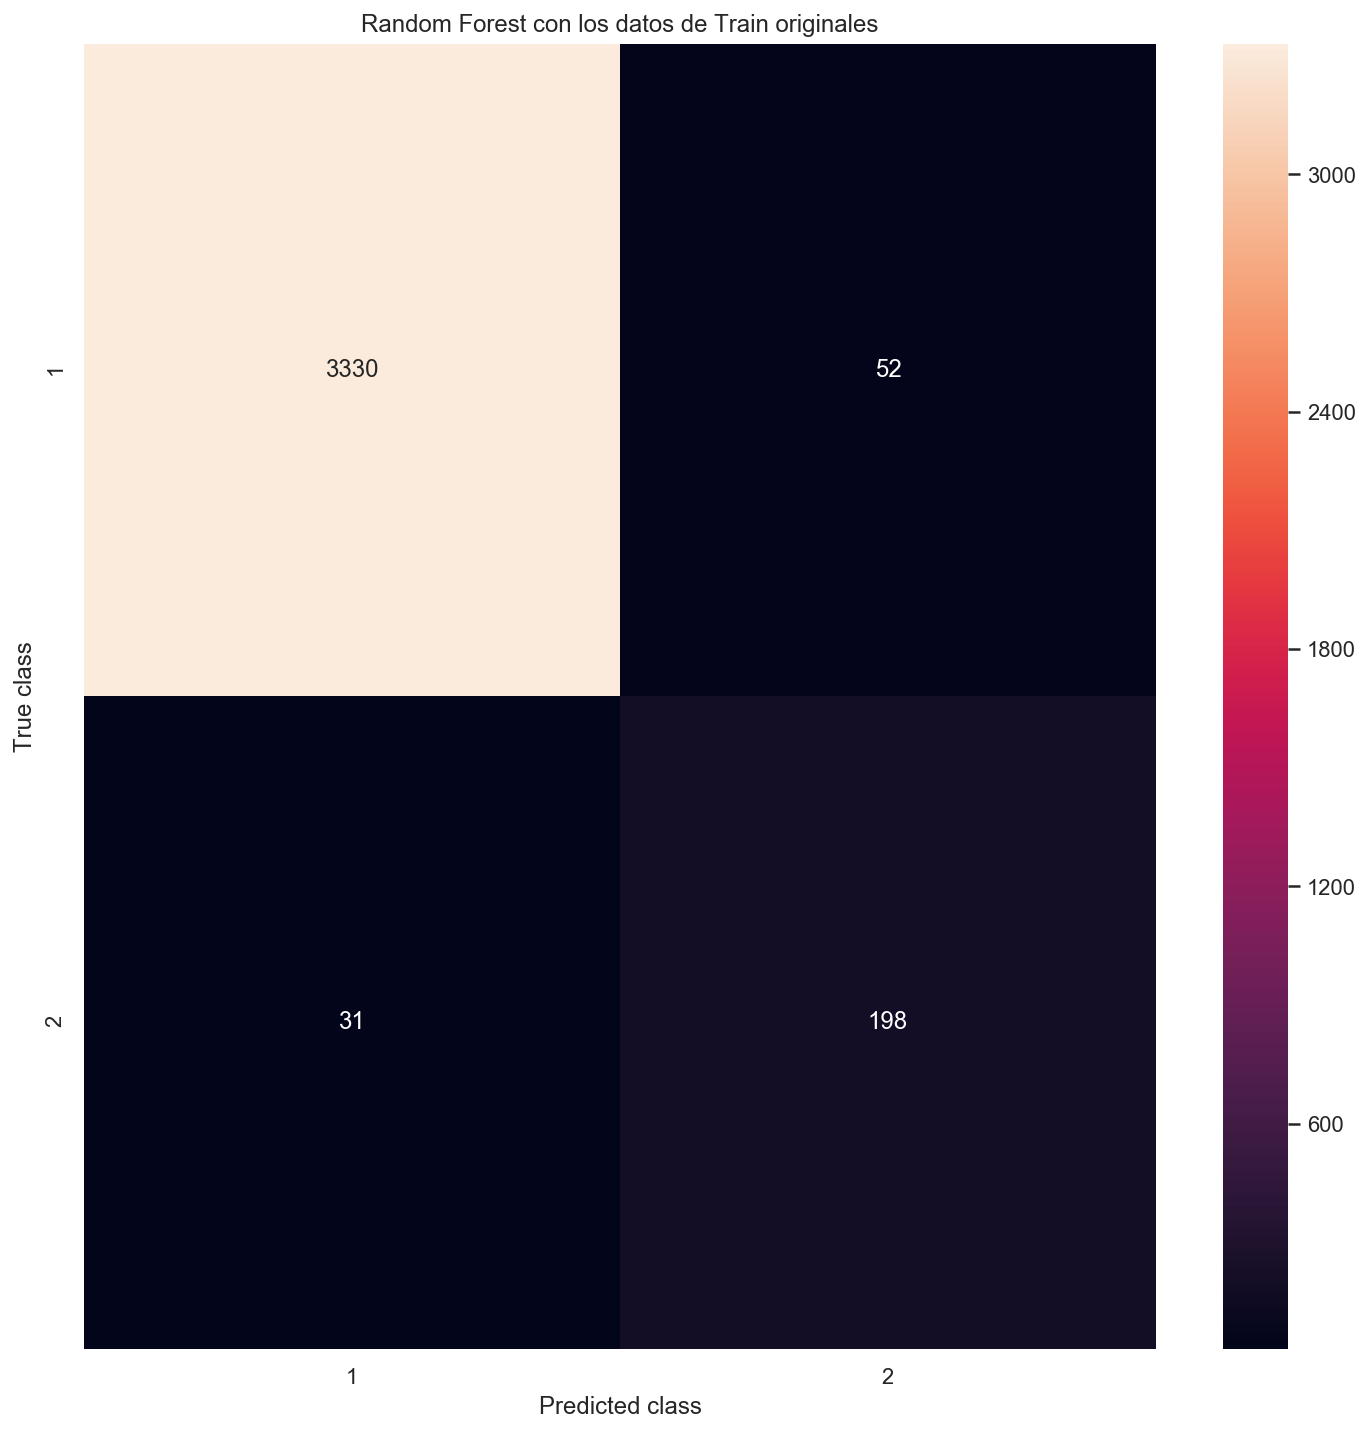

              precision    recall  f1-score   support

           1       0.99      0.98      0.99      3382
           2       0.79      0.86      0.83       229

    accuracy                           0.98      3611
   macro avg       0.89      0.92      0.91      3611
weighted avg       0.98      0.98      0.98      3611



In [159]:
if executeWithBorutaVariables:
  mostrar_resultados(y_train, model_forest_classifier.predict(X_train[features_boruta]), "Random Forest con los datos de Train originales")
else :
  mostrar_resultados(y_train, model_forest_classifier.predict(X_train), "Random Forest con los datos de Train originales")

In [160]:
### árbol de Decisión ###
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

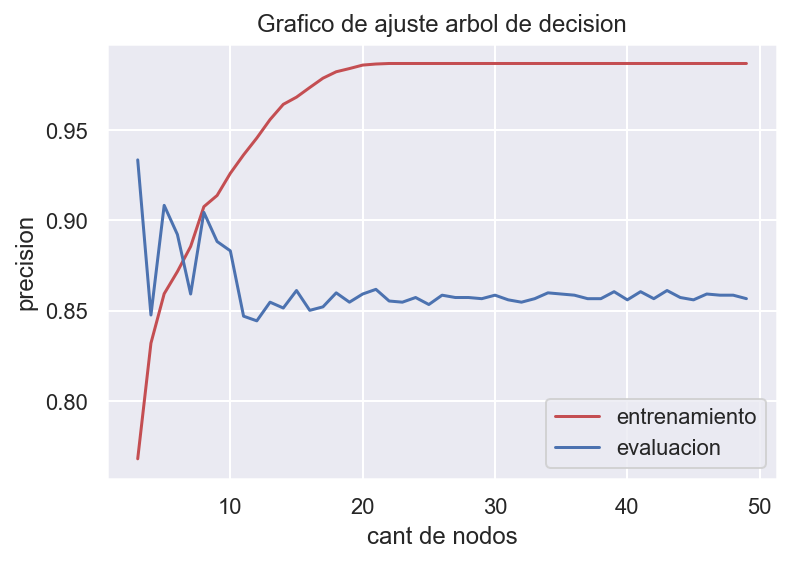

In [161]:
# Grafico de ajuste del árbol de decisión
train_prec =  []
eval_prec = []
max_deep_list = list(range(3, 50))

for deep in max_deep_list:
    arbol3 = DecisionTreeClassifier(criterion='entropy', max_depth=deep)
    arbol3.fit(X_train_balanced[features_boruta], y_train_balanced)
    train_prec.append(arbol3.score(X_train_balanced[features_boruta], y_train_balanced))
    eval_prec.append(arbol3.score(X_test[features_boruta], y_test))

# graficar los resultados.
plt.plot(max_deep_list, train_prec, color='r', label='entrenamiento')
plt.plot(max_deep_list, eval_prec, color='b', label='evaluacion')
plt.title('Grafico de ajuste arbol de decision')
plt.legend()
plt.ylabel('precision')
plt.xlabel('cant de nodos')
plt.show()

In [162]:
tree = DecisionTreeClassifier (criterion="entropy",  random_state=99, max_depth=6)
tree.fit(X_train_balanced[features_boruta], y_train_balanced)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=99, splitter='best')

In [163]:
pred_tree= tree.predict(X_test[features_boruta])
pred_tree

array([2, 1, 1, ..., 1, 1, 1], dtype=int64)

In [164]:
# MATRIZ DE CONFUSIÓN
actual = y_test
predicted = pred_tree
results = confusion_matrix(actual, predicted) 
print ('Confusion Matrix :')
print(pd.crosstab(np.transpose(y_test), predicted, rownames=["Actual"], colnames=["Predicción"]))
print("")
print ('Accuracy Score :',accuracy_score(actual, predicted) )
print ('Report : ')
print(classification_report(actual, predicted) )

Confusion Matrix :
Predicción     1   2
Actual              
1           1355  83
2             81  29

Accuracy Score : 0.8940568475452196
Report : 
              precision    recall  f1-score   support

           1       0.94      0.94      0.94      1438
           2       0.26      0.26      0.26       110

    accuracy                           0.89      1548
   macro avg       0.60      0.60      0.60      1548
weighted avg       0.89      0.89      0.89      1548



In [165]:
from sklearn.model_selection import cross_val_score

precision_cv_tree= cross_val_score(estimator=tree,X=X_train[features_boruta], y=y_train,
                                            cv=5, n_jobs=-1)

print('precisiones: {}'.format(precision_cv_tree))
print('Precision promedio: {0: .3f} +/- {1: .3f}'.format(np.mean(precision_cv_tree),
                                          np.std(precision_cv_tree)))

precisiones: [0.93499308 0.93351801 0.93351801 0.92797784 0.92797784]
Precision promedio:  0.932 +/-  0.003


In [172]:
### Naive Bayes ###
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import SelectKBest
gnb=GaussianNB()
gnb.fit(X_train[features_boruta].values,y_train)

print('Precisión en el set de Entrenamiento:{:.2f}'.format(gnb.score(X_train[features_boruta],y_train)))
print('Precisión en el set de Test:{:.2f}'.format(gnb.score(X_test[features_boruta],y_test)))


Precisión en el set de Entrenamiento:0.92
Precisión en el set de Test:0.92


In [173]:
pred_gnb= gnb.predict(X_test[features_boruta])
pred_gnb

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [174]:
# MATRIZ DE CONFUSIÓN NAÏVE BAYES 
actual = y_test
predicted = pred_gnb
results = confusion_matrix(actual, predicted) 
print ('Confusion Matrix :')
print(pd.crosstab(np.transpose(y_test), predicted, rownames=["Actual"], colnames=["Predicción"]))
print("")
print ('Accuracy Score :',accuracy_score(actual, predicted) )
print ('Report : ')
print(classification_report(actual, predicted) )

Confusion Matrix :
Predicción     1   2
Actual              
1           1413  25
2            103   7

Accuracy Score : 0.917312661498708
Report : 
              precision    recall  f1-score   support

           1       0.93      0.98      0.96      1438
           2       0.22      0.06      0.10       110

    accuracy                           0.92      1548
   macro avg       0.58      0.52      0.53      1548
weighted avg       0.88      0.92      0.90      1548



In [176]:
### XGBoost ###

from xgboost import XGBClassifier
xgb_model = XGBClassifier(max_depth=40)

xgb_model.fit(X_train_balanced[features_boruta], y_train_balanced)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=40,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [177]:
pred_xgb=xgb_model.predict(X_test[features_boruta])


In [178]:
## Matriz de Confusión ###
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
actual = y_test
predicted = pred_xgb
results = confusion_matrix(actual, predicted) 
print ('Confusion Matrix :')
print(pd.crosstab(np.transpose(y_test), predicted, rownames=["Actual"], colnames=["Predicción"]))
print("")
print ('Accuracy Score :',accuracy_score(actual, predicted) )
print ('Report : ')
print(classification_report(actual, predicted) )

Confusion Matrix :
Predicción     1   2
Actual              
1           1363  75
2             87  23

Accuracy Score : 0.8953488372093024
Report : 
              precision    recall  f1-score   support

           1       0.94      0.95      0.94      1438
           2       0.23      0.21      0.22       110

    accuracy                           0.90      1548
   macro avg       0.59      0.58      0.58      1548
weighted avg       0.89      0.90      0.89      1548

